In [1]:
# custom modules for data prep:
import acquire as a
import prepare as p
import model as m

# tabular manipulation
import numpy as np
import pandas as pd


#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats


# ML stuff:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,\
precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #logistic not linear!
from sklearn.neighbors import KNeighborsClassifier #pick the classifier one

In [2]:
df=a.get_telco_data()

this file exists, reading csv


In [3]:
df=p.prep_telco(df)
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check
9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64

In [5]:
train,val,test=p.splitting_data(df,'churn')

In [6]:
print(f'shape of iris DB: {df.shape}')
print('-----------------------------')
print(f'shape of train_iris: {train.shape}')
print(f'shape of validate_iris: {val.shape}')
print(f'shape of test_iris: {test.shape}')

shape of iris DB: (7043, 20)
-----------------------------
shape of train_iris: (4225, 20)
shape of validate_iris: (1409, 20)
shape of test_iris: (1409, 20)


## Exploration on train telco dataframe

In [7]:
# make two lists, one with all categorical variables and another with all continouus vairables
#intializing empty lists
cat_col = []
con_col = []

#looping through all columns
for col in train.columns:
        #finding all my categorical columns by checking for how many unique values
        # if less than 100, append to cat_col
        if train[col].nunique() < 100:
            cat_col.append(col)
        else: 
            #if it has more than 100 unique values, append to continous column variable
            con_col.append(col)

In [8]:
# check categorical lists
cat_col

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [9]:
# check continuous lists
con_col

['monthly_charges', 'total_charges']

In [10]:
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,neither,Mailed check


In [11]:
# Target variable is churn
target_variable = 'churn'

# Initialize an empty list to store columns for comparison
columns_to_compare = []

# Create a for loop to iterate through each column in the categorical column list
# appending our comparision list as long as the column is not churn
for column in cat_col:
    if column != target_variable:
        columns_to_compare.append(column)
    else:
        pass

In [12]:
columns_to_compare

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type']

## Bar plot visualization categorical column VS 'churn'

In [13]:
train.tech_support.value_counts()

tech_support
No                     2096
Yes                    1211
No internet service     918
Name: count, dtype: int64

In [14]:
train.streaming_movies.value_counts()

streaming_movies
No                     1655
Yes                    1652
No internet service     918
Name: count, dtype: int64

In [15]:
train.streaming_tv.value_counts()

streaming_tv
No                     1673
Yes                    1634
No internet service     918
Name: count, dtype: int64


Contingency Table for gender vs. churn:

churn     No  Yes
gender           
Female  1550  559
Male    1554  562


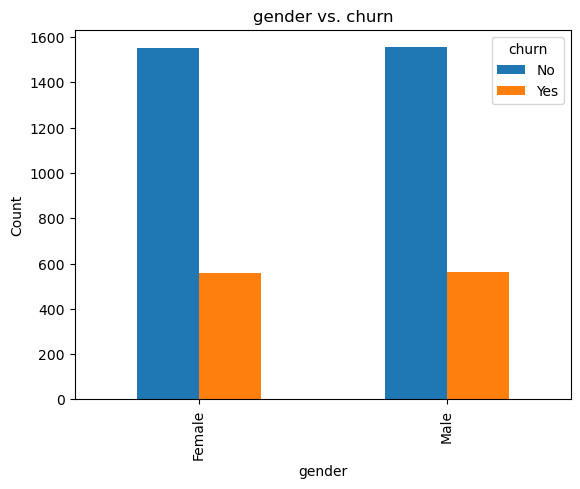


Contingency Table for senior_citizen vs. churn:

churn             No  Yes
senior_citizen           
0               2696  835
1                408  286


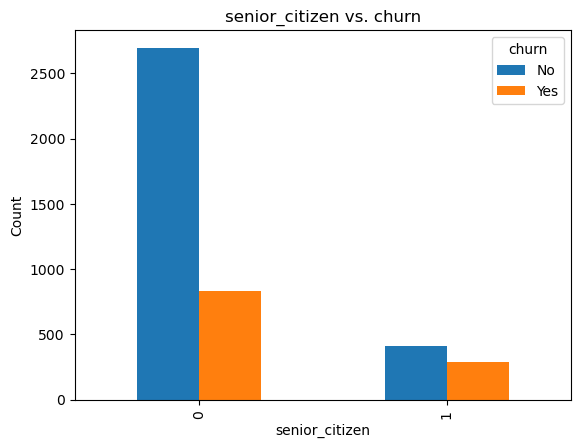


Contingency Table for partner vs. churn:

churn      No  Yes
partner           
No       1445  715
Yes      1659  406


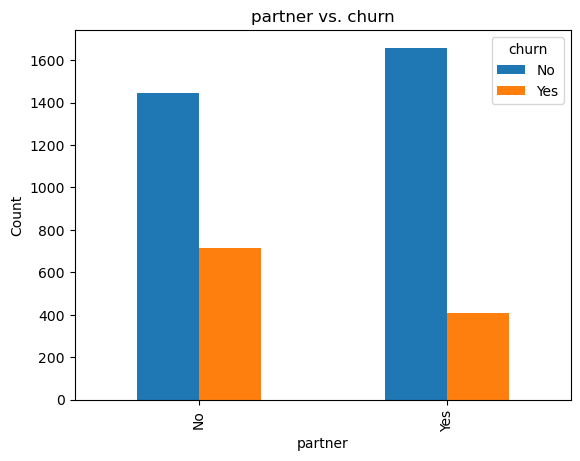


Contingency Table for dependents vs. churn:

churn         No  Yes
dependents           
No          2042  919
Yes         1062  202


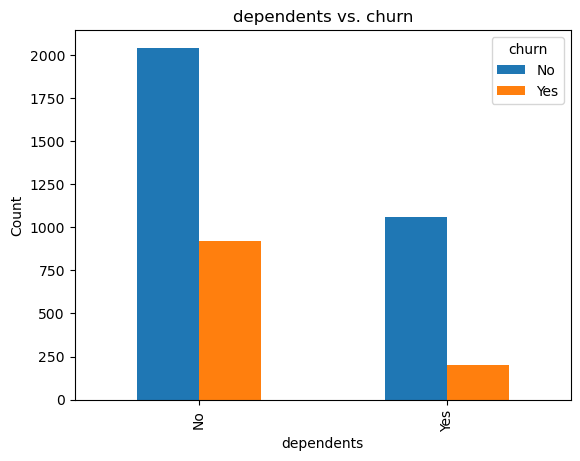


Contingency Table for tenure vs. churn:

churn    No  Yes
tenure          
0         8    0
1       128  225
2        61   81
3        67   57
4        57   51
...     ...  ...
68       51    6
69       60    4
70       65    5
71       94    4
72      228    5

[73 rows x 2 columns]


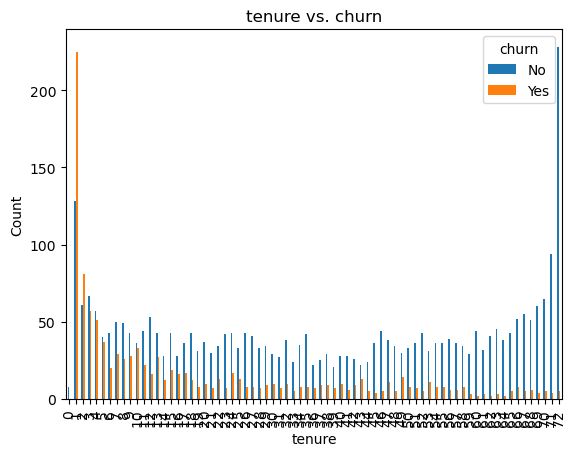


Contingency Table for phone_service vs. churn:

churn            No   Yes
phone_service            
No              295    99
Yes            2809  1022


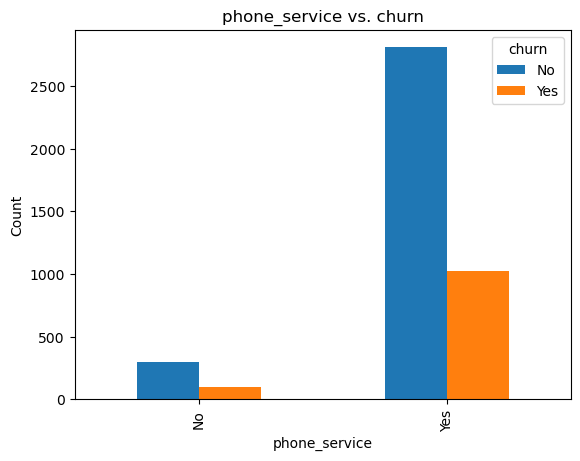


Contingency Table for multiple_lines vs. churn:

churn               No  Yes
multiple_lines             
No                1500  520
No phone service   295   99
Yes               1309  502


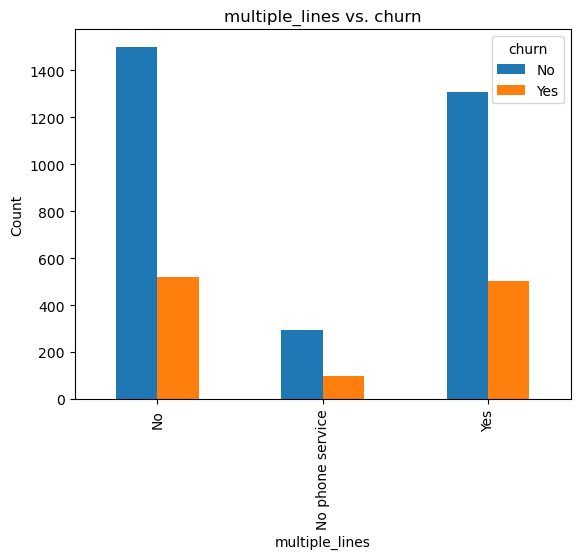


Contingency Table for online_security vs. churn:

churn                  No  Yes
online_security               
No                   1230  885
No internet service   848   70
Yes                  1026  166


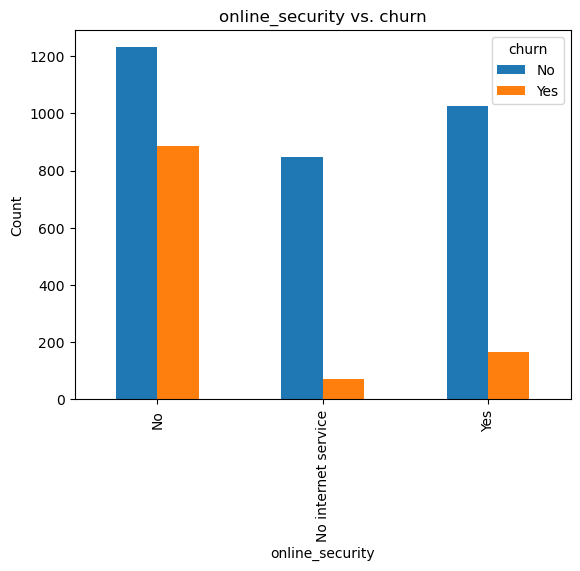


Contingency Table for online_backup vs. churn:

churn                  No  Yes
online_backup                 
No                   1097  732
No internet service   848   70
Yes                  1159  319


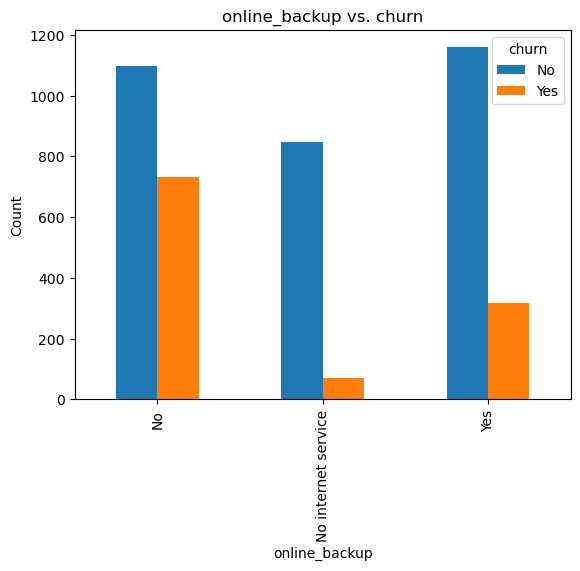


Contingency Table for device_protection vs. churn:

churn                  No  Yes
device_protection             
No                   1119  702
No internet service   848   70
Yes                  1137  349


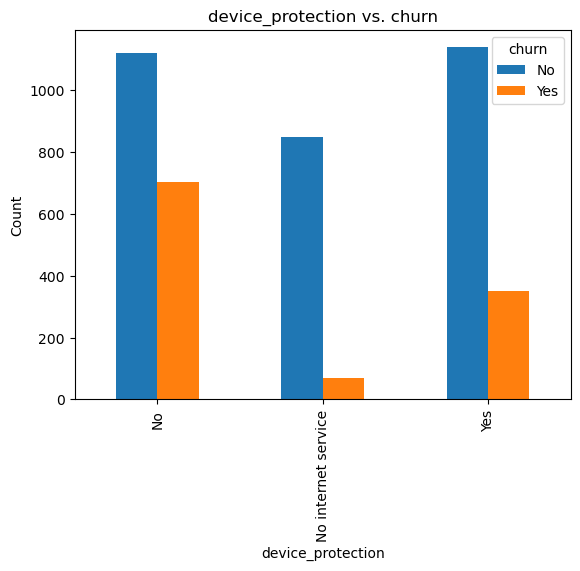


Contingency Table for tech_support vs. churn:

churn                  No  Yes
tech_support                  
No                   1230  866
No internet service   848   70
Yes                  1026  185


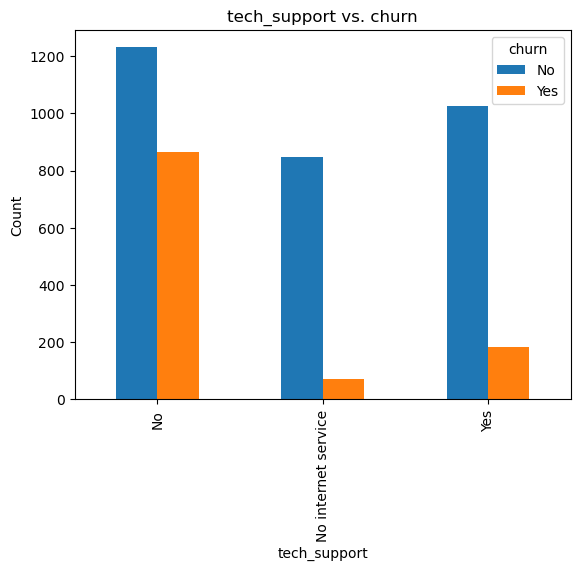


Contingency Table for streaming_tv vs. churn:

churn                  No  Yes
streaming_tv                  
No                   1100  573
No internet service   848   70
Yes                  1156  478


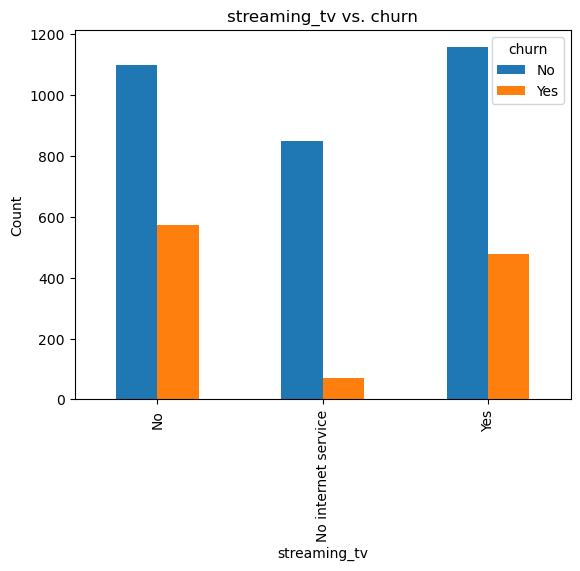


Contingency Table for streaming_movies vs. churn:

churn                  No  Yes
streaming_movies              
No                   1101  554
No internet service   848   70
Yes                  1155  497


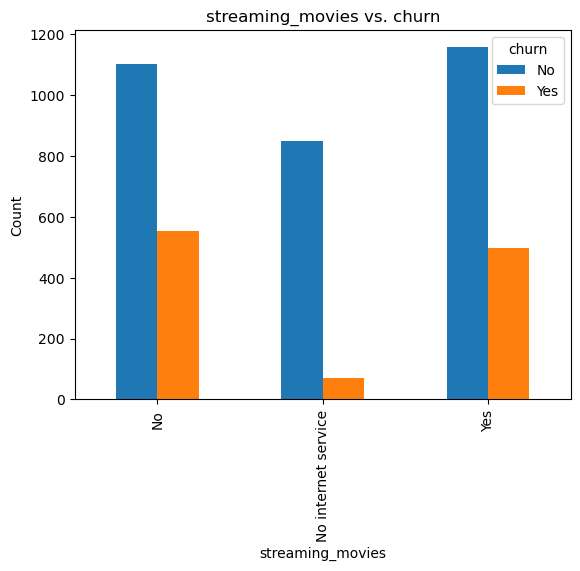


Contingency Table for paperless_billing vs. churn:

churn                No  Yes
paperless_billing           
No                 1437  281
Yes                1667  840


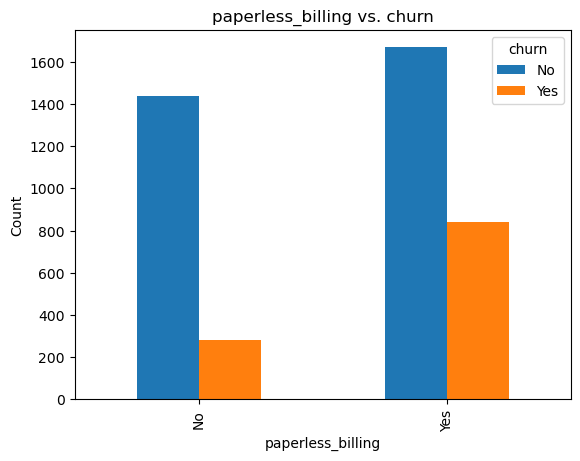


Contingency Table for contract_type vs. churn:

churn             No  Yes
contract_type            
Month-to-month  1338  997
One year         785   94
Two year         981   30


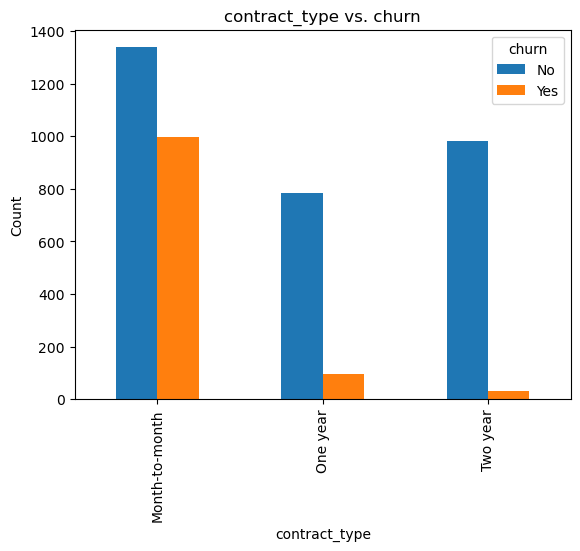


Contingency Table for internet_service_type vs. churn:

churn                    No  Yes
internet_service_type           
DSL                    1140  269
Fiber optic            1116  782
neither                 848   70


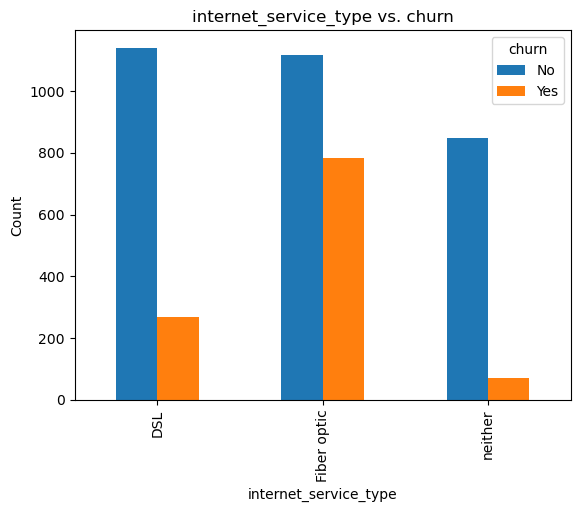


Contingency Table for payment_type vs. churn:

churn                       No  Yes
payment_type                       
Bank transfer (automatic)  778  157
Credit card (automatic)    783  138
Electronic check           788  646
Mailed check               755  180


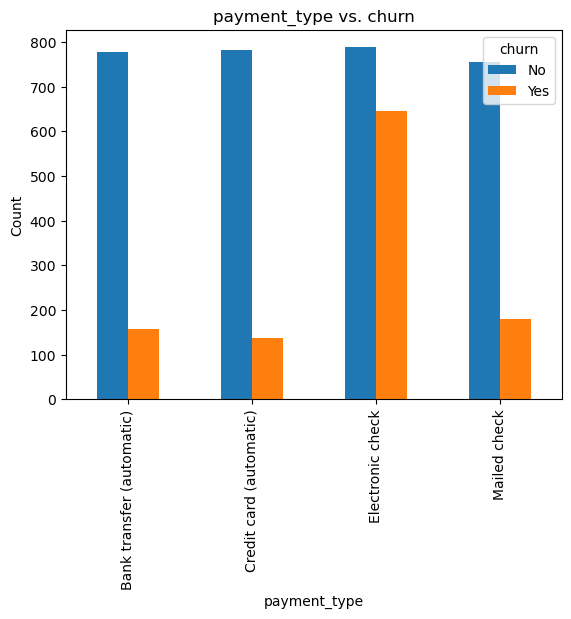

In [16]:
# For loop to create contingency table and bar plot for each comparision column vs churn
# describe and visualize the distribution of categorical variables and make inferences about 
# the equality of proportions, independence of the variables, or agreement between variables.
for column in columns_to_compare:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train[target_variable])
    
    # Display the contingency table
    print(f"\nContingency Table for {column} vs. {target_variable}:\n")
    print(contingency_table)
    
    # To help visualize the contingency table, we can use a stacked bar plot
    contingency_table.plot.bar()
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Box plot visualization Continuous column VS 'churn'

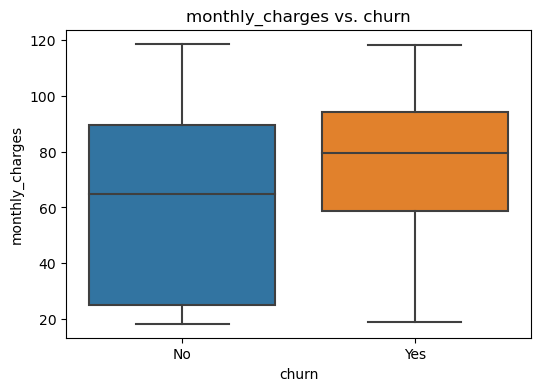

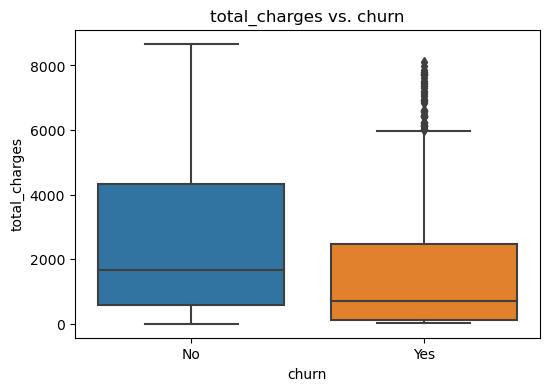

In [17]:

# Create a for loop to compare each continuous variable to the target variable
for column in con_col:
    
    # Visualize the distribution of the continuous variable 
    plt.figure(figsize=(6, 4))
    
    

    # Box plot with target variable and count
    sns.boxplot(x=target_variable, y=column, data=train)
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(column)
    plt.show()

In [18]:
# loop for chi^2 test between 'churn' vs 'categorical variables'
for column in cat_col:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train['churn'])

    # Perform chi-square test
    chi2, p,degf, expected = stats.chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {column} against churn:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, "and churn.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between", column, "and churn.")

    print("\n" + "="*50 + "\n")

Chi-square test for gender against churn:
Chi2 statistic: 2.4733283637992e-05
P-value: 0.996031931504371
Fail to reject the null hypothesis. There is not enough evidence of association between gender and churn.


Chi-square test for senior_citizen against churn:
Chi2 statistic: 90.8791641507161
P-value: 1.5271938515844278e-21
Reject the null hypothesis. There is evidence of association between senior_citizen and churn.


Chi-square test for partner against churn:
Chi2 statistic: 97.15376877725984
P-value: 6.414706667955165e-23
Reject the null hypothesis. There is evidence of association between partner and churn.


Chi-square test for dependents against churn:
Chi2 statistic: 102.24217978518547
P-value: 4.91325418673439e-24
Reject the null hypothesis. There is evidence of association between dependents and churn.


Chi-square test for tenure against churn:
Chi2 statistic: 699.0204275095577
P-value: 1.82885051344591e-103
Reject the null hypothesis. There is evidence of association betwe

## 1st Hypothesis Test





> 1. Hypothesis:

Q: does payment_type affect whether or not someone churned?

> 2. Visualize

In [19]:
train.payment_type.value_counts()

payment_type
Electronic check             1434
Mailed check                  935
Bank transfer (automatic)     935
Credit card (automatic)       921
Name: count, dtype: int64

In [20]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

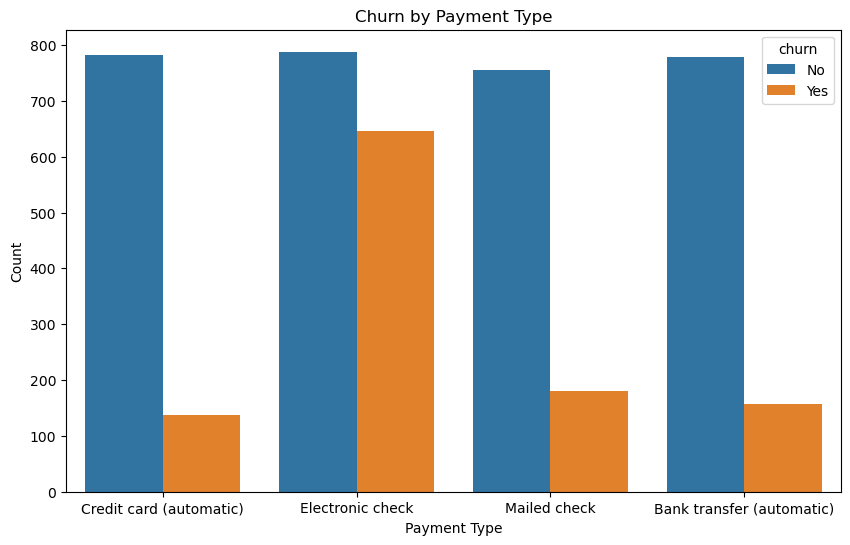

In [21]:
# customers with electronic check payment types churned a lot
plt.figure(figsize=(10, 6))
sns. countplot(data=train,x='payment_type', hue='churn' )
plt.title('Churn by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

note:- customers with electronic check payment type churned a lot more than other payment types.

> 3. Analyze with stats

Hypothesis Setting:(two categorical variables: use chi^2)

Ho: There is no relationship between payment_type and churn.

Ha: There is relationship between payment_type and churn.

alpha=0.05



In [22]:
alpha=0.05


In [23]:
# create crosstab
observed = pd.crosstab(train.churn, train.payment_type)
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,778,783,788,755
Yes,157,138,646,180


In [24]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [25]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[778 783 788 755]
 [157 138 646 180]]

Expected
[[ 686  676 1053  686]
 [ 248  244  380  248]]

----
chi^2 = 386.1840
p     = 0.0000


In [26]:
# conclusion:
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


Thats means, there is relationship between 'payment_type' and 'churn',

> 4. Summarize

One particular type of payment method (Electronic check) shows a lot of customer churn. This might be due to some factor related to fees or delivery speed. Will need to investigate further asking are there fees associated with each payment type, what are their delivery speeds?



## 2nd Hypothesis Test

>1. Hypothesis

Q: does contract type affect whether or not someone has churned? 

In [27]:
train.contract_type.value_counts()

contract_type
Month-to-month    2335
Two year          1011
One year           879
Name: count, dtype: int64

In [28]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

> 2. Visualize

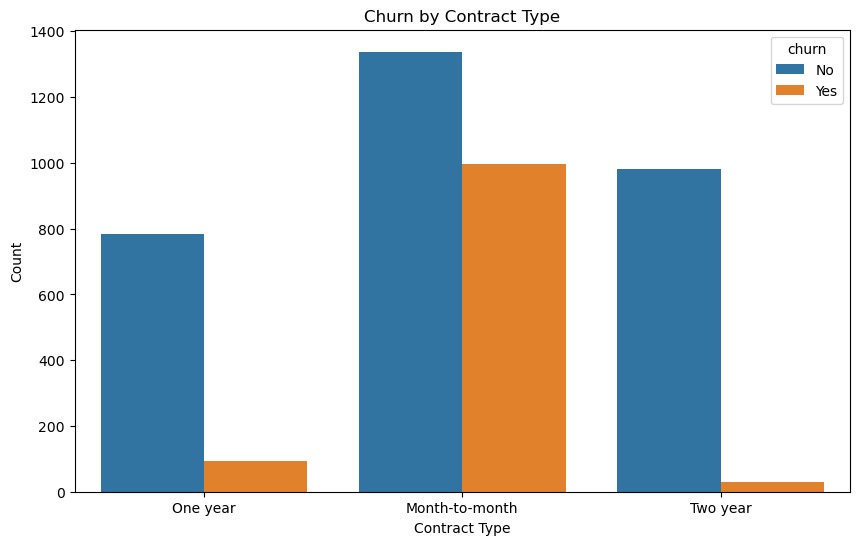

In [29]:
# customers with month to month contract types churned a lot
plt.figure(figsize=(10, 6))
sns. countplot(data=train,x='contract_type', hue='churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

From this bar diagram shows customers with Month-to-month contract type has more churn number than others.

> 3. Analyze with stats

Hypothesis Setting:(two categorical variables: use chi^2)

Ho: There is no relationship between contract_type and churn.

Ha: There is relationship between contract_type and churn.

alpha=0.05

In [30]:
# create crosstab
observed_ct = pd.crosstab(train.churn, train.contract_type)
observed_ct

contract_type,Month-to-month,One year,Two year
churn,,,
No,1338,785,981
Yes,997,94,30


In [31]:

chi2, p, dof, expected = stats.chi2_contingency(observed_ct)

In [32]:
#output values
print('Observed')
print(observed_ct.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1338  785  981]
 [ 997   94   30]]

Expected
[[1715  645  742]
 [ 619  233  268]]

----
chi^2 = 714.1745
p     = 0.0000


In [33]:
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


This concludes that there is relationship between contract_type and churn.

>4. Summarize

One particular contract type (month-to-month) has a lot of customers with churned status. This would make sense becuase people with long contracts can not churn as easily as customers with month to month contracts. 
Suggestion: we might recommend to customers for over a year to prevent their churn rate is going high.

## 3rd Hypothesis Test

1. Hypothesis:

Q: Does tenure affects the churned customer?

> 2. visualize

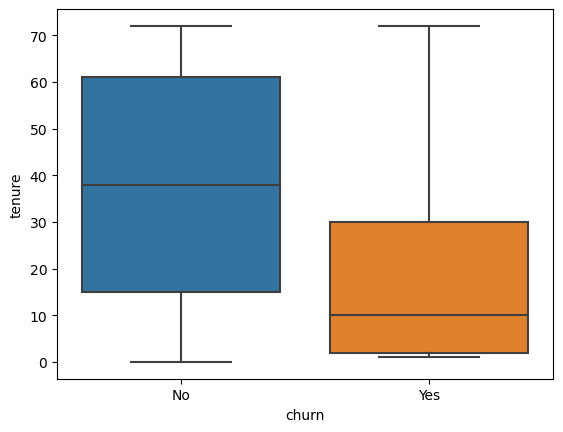

In [34]:
sns.boxplot(data=train, y='tenure', x='churn');

it appears customers are churning early on in their tenure. Customers who have stayed with telco are still with telco

> 3. Analyze with stats

comparing categorical to categorical because we are going to bin tenure into years, of which the higest tenure is 72 months.

Ho: There is no relationship between tenure and whether or not someone has churned

Ha: There is a relationship between tenure and whether or not someone has churned



In [35]:
# Create bins for tenure in terms of years
bins = [0, 12, 24, 36, 48, 60, 72, 84]  # adjust as needed

# Create labels for the bins (representing years)
labels = ['0', '1', '2', '3', '4', '5', '6']

# Bin the 'tenure' column
train['tenure_years'] = pd.cut(train['tenure'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'tenure_years' column
print(train[['tenure', 'tenure_years']])

             tenure tenure_years
customer_id                     
4083-BFNYK       38            3
5804-LEPIM        2            0
4895-TMWIR       11            0
1342-JPNKI       10            0
3397-AVTKU       43            3
...             ...          ...
1915-IOFGU        1            0
7025-WCBNE       47            3
9788-HNGUT       72            6
5229-PRWKT        8            0
7562-UXTPG       13            1

[4225 rows x 2 columns]


In [36]:
observed_tenure = pd.crosstab(train.churn, train.tenure_years)
observed_tenure

tenure_years,0,1,2,3,4,5,6
churn,,,,,,,
No,626,448,422,343,417,620,228
Yes,609,164,110,95,89,49,5


In [37]:

chi2, p, dof, expected = stats.chi2_contingency(observed_tenure)

In [38]:
#output values
print('Observed')
print(observed_tenure.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[626 448 422 343 417 620 228]
 [609 164 110  95  89  49   5]]

Expected
[[907 449 390 321 371 491 171]
 [327 162 141 116 134 177  61]]

----
chi^2 = 561.8805
p     = 0.0000


In [39]:
# conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


This concludes that there is relationship between tenure and churn.

> 4. Summarize

New customers are more churned than the low tenure customers.

In [40]:
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_years
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,...,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),3
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,...,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,0
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,neither,Mailed check,0


## 4th Hypothesis Test ( relationship test)

### Hypothesis:
### Q: Does monthly charges indicate whether or not someone churned?

## visualization


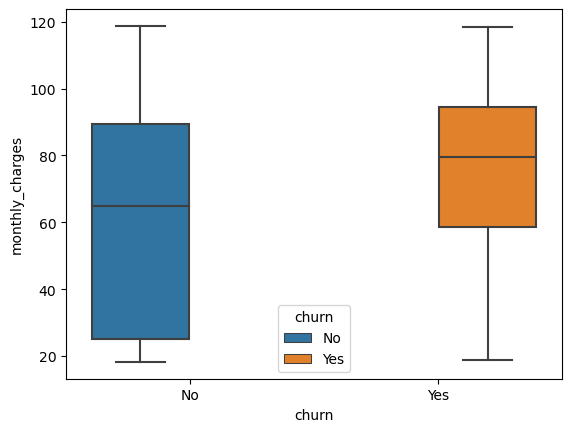

In [41]:
sns.boxplot(data=train, x='churn', y='monthly_charges',hue='churn')
plt.show()

<Axes: xlabel='monthly_charges', ylabel='Count'>

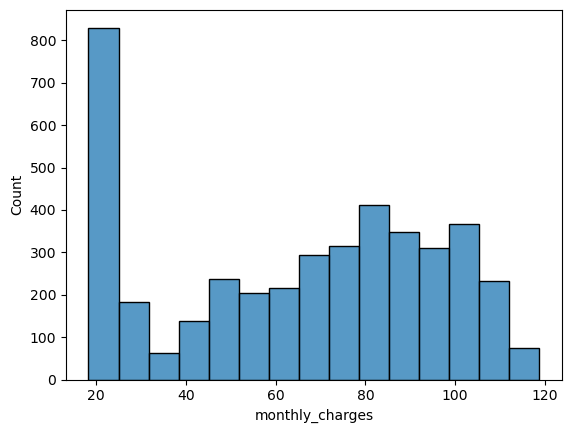

In [42]:
# histogram of 'monthly_charges'
sns.histplot(train.monthly_charges)

In [43]:
#make two arrays of peoples for churned and not churned

#all the fares for people that survived
churned = train[train.churn == 'Yes'].monthly_charges

#all the fares for people that didnt survive
not_churned = train[train.churn == 'No'].monthly_charges

In [44]:
print(f'churned shape:{churned.shape}')
print(f'not_churned shape:{not_churned.shape}')


churned shape:(1121,)
not_churned shape:(3104,)


In [45]:
# for normality check
sha_stat, p_val = stats.shapiro(train.monthly_charges)
sha_stat, p_val

(0.9185670018196106, 5.647232811229013e-43)

since p_val<alpha, so we reject Ho. This conclude that monthly_charges does not follow the normal distribution.

### Analyze:
Ho: there is no relationship between 'churn' and 'monthly_charges'.

Ha: there is relationship between 'churn' and 'monthly_charges'.

In [46]:
# since 'monthly_charges' does not follow the normal distribution, so 
# for the comparision of two sample means (churned vs not_churned), we use mann-whitney test

# Performing a mann-whitney

stat, p_value = stats.mannwhitneyu(churned,not_churned)
print(f'stat:{stat}')
print(f'p_value:{p_value}')

stat:2136241.0
p_value:9.83259830397179e-30


since p_value < alpha, so we reject Ho. This conclude that there is relationship between 'churn' and 'monthly_charges'.

## summarize:
By visualization shows that whose customer has monthly charges high, they churned. Further, mannwhitneyu test shows there is a storng relation between 'churn' and 'monthly_charges. 

so i might put some recommendation that instead of monthly contract customer, we might offer some good discount rate those customers who will sign up for a year contract.

### drop 'tenure_years'

In [47]:
train=train.drop(columns='tenure_years')

In [48]:
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,neither,Mailed check


# preprocessing 

In [49]:
# encoding with each dataframes train, validate, and test

In [50]:
train_en,val_en,test_en=m.preprocess_telco(train,val,test) 


In [51]:
train_en.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [52]:
# separate independents feature & target

X_train, y_train = train_en.drop(columns='churn_Yes'), train_en.churn_Yes
X_validate, y_validate = val_en.drop(columns='churn_Yes'), val_en.churn_Yes
X_test, y_test = test_en.drop(columns='churn_Yes'), test_en.churn_Yes

In [53]:
X_train.head(3)
            

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [54]:
X_validate.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_neither,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
0486-LGCCH,0,11,19.65,225.75,1,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1
8436-BJUMM,0,26,83.75,2070.60,1,1,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
7816-VGHTO,0,6,40.55,217.50,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [55]:
y_train.head(3)

customer_id
4083-BFNYK    0
5804-LEPIM    1
4895-TMWIR    1
Name: churn_Yes, dtype: int64

### baseline from train dataframe

In [56]:
# i am going to find the baseline of churn
y_train.value_counts()

churn_Yes
0    3104
1    1121
Name: count, dtype: int64

In [57]:
# i am going to find the baseline of churn
y_train.mode()

0    0
Name: churn_Yes, dtype: int64

In [58]:
# by manually calculating, the baseline accuracy
3104/4225

0.7346745562130178

In [59]:
# code way, the baseline accuracy
y_train.value_counts(normalize=True)[0]


0.7346745562130178

# model1 to 20:  Decision Tree 

In [60]:
#create the object
tree = DecisionTreeClassifier()  # default max_depth=None
tree

DecisionTreeClassifier()

In [61]:
#fit the object
tree.fit(X_train, y_train) #fit only on TRAIN DATA!

DecisionTreeClassifier()

In [62]:
#store my predicted values
y_pred = tree.predict(X_train)
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [63]:
#probabilities
y_proba=tree.predict_proba(X_train).round(2)
y_proba[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [64]:
#calculate accuracy
tree.score(X_train, y_train)

0.9978698224852071

In [65]:
# calculate accuracy for validate
tree.score(X_validate,y_validate)

0.7345635202271115

### for loop with 1 to 20 max_depth hyperparameters

In [66]:

#for x in range(1,21):
    #create the object
#    tree = DecisionTreeClassifier(max_depth=x)
    
    #fit the object
#    tree.fit(X_train, y_train) #fit only on TRAIN DATA!
    
    #calculate the accuracy for train
#    acc = tree.score(X_train, y_train)
    
    
    #calculate the accuracy for validate
#    acc_val = tree.score(X_validate, y_validate)
    
#   print(f'with a max depth of {x}, the accuracy for train is {round(acc,2)}')
#   print(f'with a max depth of {x}, the accuracy for validate is {round(acc_val,2)}')
#    print()
    
   

With a max depth of 1, the accuracy for train is 0.74
With a max depth of 1, the accuracy for validate is 0.73

With a max depth of 2, the accuracy for train is 0.78
With a max depth of 2, the accuracy for validate is 0.79

With a max depth of 3, the accuracy for train is 0.78
With a max depth of 3, the accuracy for validate is 0.79

With a max depth of 4, the accuracy for train is 0.79
With a max depth of 4, the accuracy for validate is 0.78

With a max depth of 5, the accuracy for train is 0.8
With a max depth of 5, the accuracy for validate is 0.79

With a max depth of 6, the accuracy for train is 0.81
With a max depth of 6, the accuracy for validate is 0.79

With a max depth of 7, the accuracy for train is 0.83
With a max depth of 7, the accuracy for validate is 0.79

With a max depth of 8, the accuracy for train is 0.84
With a max depth of 8, the accuracy for validate is 0.79

With a max depth of 9, the accuracy for train is 0.86
With a max depth of 9, the accuracy for validate is

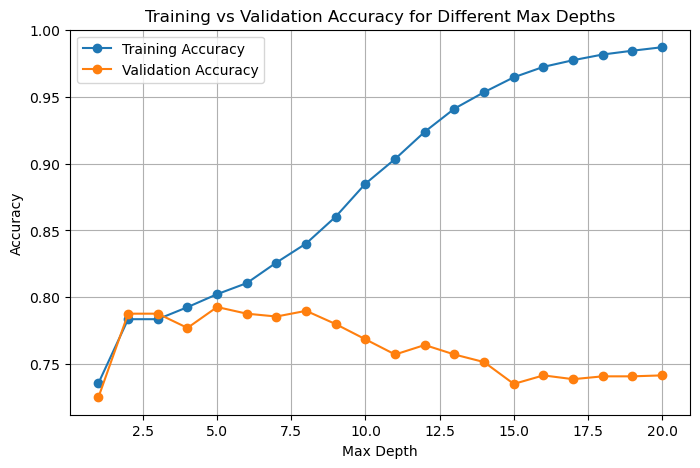

In [67]:

train_accuracies = []
val_accuracies = []

for x in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    
    acc = tree.score(X_train, y_train)
    acc_val = tree.score(X_validate, y_validate)
    
    train_accuracies.append(acc)
    val_accuracies.append(acc_val)
    
    print(f'With a max depth of {x}, the accuracy for train is {round(acc, 2)}')
    print(f'With a max depth of {x}, the accuracy for validate is {round(acc_val, 2)}')
    print()

# Plotting the accuracy trends after the loop completes
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()


### compare
From this output, max_depth=5 is the best model for decision tree algorithm.
Since it is lies between under fitting and over fitting

# model 1 to 10 with Random forest algorithm

In [68]:
#for x in range(1,11):
#    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

#   rf.fit(X_train, y_train)

    

#    acc = rf.score(X_train, y_train)
    
#    acc_val=rf.score(X_validate,y_validate)
    
#    print(f'for min leaf samples = {x} and max depth = {11-x}, the accuracy for train is {round(acc,2)}')
#    print(f'for min leaf samples = {x} and max depth = {11-x}, the accuracy for validate is {round(acc_val,2)}')
#    print()
    
    

For min leaf samples = 1 and max depth = 10, the accuracy for train is 0.88
For min leaf samples = 1 and max depth = 10, the accuracy for validate is 0.8

For min leaf samples = 2 and max depth = 9, the accuracy for train is 0.84
For min leaf samples = 2 and max depth = 9, the accuracy for validate is 0.8

For min leaf samples = 3 and max depth = 8, the accuracy for train is 0.83
For min leaf samples = 3 and max depth = 8, the accuracy for validate is 0.8

For min leaf samples = 4 and max depth = 7, the accuracy for train is 0.82
For min leaf samples = 4 and max depth = 7, the accuracy for validate is 0.8

For min leaf samples = 5 and max depth = 6, the accuracy for train is 0.81
For min leaf samples = 5 and max depth = 6, the accuracy for validate is 0.8

For min leaf samples = 6 and max depth = 5, the accuracy for train is 0.8
For min leaf samples = 6 and max depth = 5, the accuracy for validate is 0.79

For min leaf samples = 7 and max depth = 4, the accuracy for train is 0.8
For mi

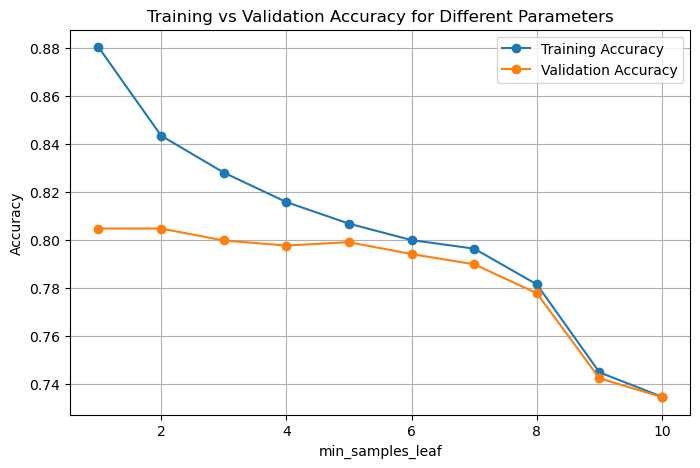

In [69]:

train_accuracies = []
val_accuracies = []

for x in range(1, 11):
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)
    rf.fit(X_train, y_train)
    
    acc = rf.score(X_train, y_train)
    acc_val = rf.score(X_validate, y_validate)
    
    train_accuracies.append(acc)
    val_accuracies.append(acc_val)
    
    print(f'For min leaf samples = {x} and max depth = {11-x}, the accuracy for train is {round(acc, 2)}')
    print(f'For min leaf samples = {x} and max depth = {11-x}, the accuracy for validate is {round(acc_val, 2)}')
    print()

# Plotting the accuracy trends
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy', marker='o')

plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Parameters')
plt.legend()
plt.grid(True)
plt.show()


### compare
* From this output, model (with leaf 5 and  depth 6) are the best model, since train and validate difference is only 0.01.so it lies between over fitting and under fitting, higher than baseline as well. 

# model 1 logistic Regression for algorithm  

In [70]:
lr = LogisticRegression() # C=1 default

In [71]:
lr.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
lr.score(X_train,y_train)

0.8040236686390533

In [73]:
lr.score(X_validate,y_validate)

0.8034066713981547

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

For C=1, the accuracy for train is 0.8
For C=1, the accuracy for validate is 0.8

For C=2, the accuracy for train is 0.8
For C=2, the accuracy for validate is 0.81

For C=3, the accuracy for train is 0.8
For C=3, the accuracy for validate is 0.81

For C=4, the accuracy for train is 0.8
For C=4, the accuracy for validate is 0.81



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

For C=5, the accuracy for train is 0.8
For C=5, the accuracy for validate is 0.81

For C=6, the accuracy for train is 0.8
For C=6, the accuracy for validate is 0.81

For C=7, the accuracy for train is 0.8
For C=7, the accuracy for validate is 0.8

For C=8, the accuracy for train is 0.8
For C=8, the accuracy for validate is 0.81

For C=9, the accuracy for train is 0.8
For C=9, the accuracy for validate is 0.81

For C=10, the accuracy for train is 0.8
For C=10, the accuracy for validate is 0.8



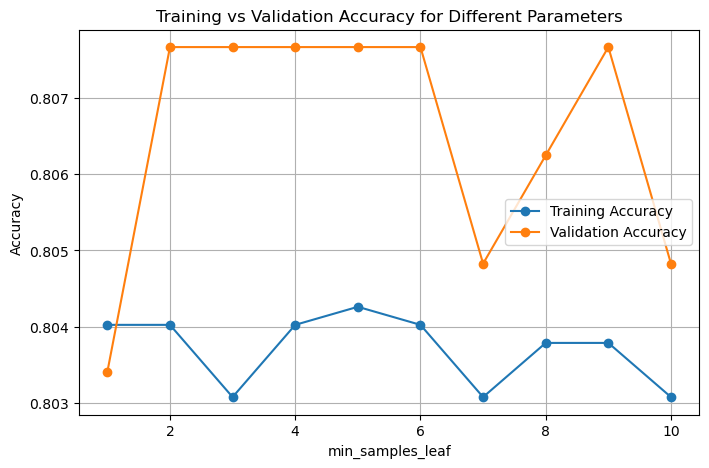

In [74]:
# for looping

train_accuracies = []
val_accuracies = []

for i in range(1, 11):
    lr1 = LogisticRegression(C=i,random_state=123)
    lr1.fit(X_train, y_train)
    
    acc = lr1.score(X_train, y_train)
    acc_val = lr1.score(X_validate, y_validate)
    
    train_accuracies.append(acc)
    val_accuracies.append(acc_val)
    
    print(f'For C={i}, the accuracy for train is {round(acc, 2)}')
    print(f'For C={i}, the accuracy for validate is {round(acc_val, 2)}')
    print()

# Plotting the accuracy trends
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy', marker='o')

plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Parameters')
plt.legend()
plt.grid(True)
plt.show()


### compare models of logistic regression
From this output, model with C=1(default) are the best model, since train and validate difference is less than 0.001.so it lies between over fitting and under fitting, and accuracy is also  higher than baseline as well.



## model 1 to 7  KNN for algorithm with different values of feature

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


for n_neighbors=5, the accuracy for train is 0.83
for n_neighbors=5, the accuracy for validate is 0.76

for n_neighbors=10, the accuracy for train is 0.81
for n_neighbors=10, the accuracy for validate is 0.79



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


for n_neighbors=20, the accuracy for train is 0.8
for n_neighbors=20, the accuracy for validate is 0.78

for n_neighbors=30, the accuracy for train is 0.79
for n_neighbors=30, the accuracy for validate is 0.77



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


for n_neighbors=40, the accuracy for train is 0.78
for n_neighbors=40, the accuracy for validate is 0.77

for n_neighbors=50, the accuracy for train is 0.78
for n_neighbors=50, the accuracy for validate is 0.76

for n_neighbors=60, the accuracy for train is 0.78
for n_neighbors=60, the accuracy for validate is 0.77



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


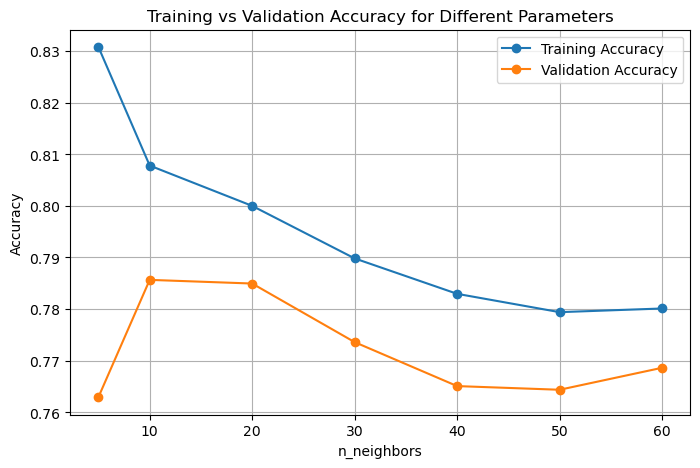

In [75]:
train_accuracies = []
val_accuracies = []
for n in [5,10,20,30,40,50,60]:

    knn = KNeighborsClassifier(n_neighbors=n) # default n_neighbors=5

    knn.fit(X_train, y_train)

    

    acc = knn.score(X_train.values, y_train) # to remove C_contiguous error we use .value
    acc_val=knn.score(X_validate.values,y_validate)
    
    train_accuracies.append(acc)
    val_accuracies.append(acc_val)
    
    print(f'for n_neighbors={n}, the accuracy for train is {round(acc,2)}')
    print(f'for n_neighbors={n}, the accuracy for validate is {round(acc_val,2)}')
    print()
    

# Plotting the accuracy trends
plt.figure(figsize=(8, 5))
plt.plot([5,10,20,30,40,50,60], train_accuracies, label='Training Accuracy', marker='o')
plt.plot([5,10,20,30,40,50,60], val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Parameters')
plt.legend()
plt.grid(True)
plt.show()


### Compare all iterated 10 modes with KNN algorithm
All iteration seems like same, but i would pick n_neighbors=20, since validate accuracy is high than baseline. 